In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (20,7)

In [315]:
def clean_trade_dataset(df):
    """
    Takes the df as provided by the imf and returns it as a clean and usable dataframe
    """
    df_transposed = df.iloc[5:,1:].T
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.iloc[1:, :]
    df_transposed.rename(columns={np.nan: "Year"}, inplace=True)
    df_transposed["Year"] = df_transposed["Year"].astype("int")
    df_transposed = df_transposed.set_index("Year")
    return df_transposed

def get_trade_activity(country_i, country_j):
    """
    Takes 2 countries as input
    Returns a dataframe with trade activity between these two countries
    X_i_j: export from country i to j
    X_i: total global export from country i
    M_i_j: import from country i to j
    M_i: total global import from country i
    Y_i: GDP of country i
    """
    X_i_j = dict_export[country_i][[country_j]].rename(columns={country_j: f"Export to {country_j}"})
    X_i = dict_export[country_i][["World"]].rename(columns={"World": f"Global Export {country_i}"})
    X_j = dict_export[country_j][["World"]].rename(columns={"World": f"Global Export {country_j}"})
    M_i_j = dict_import[country_i][[country_j]].rename(columns={country_j: f"Import from {country_j}"})
    M_i = dict_import[country_i][["World"]].rename(columns={"World": f"Global Import {country_i}"})
    M_j = dict_import[country_j][["World"]].rename(columns={"World": f"Global Import {country_j}"})
    Y_i = nominalGDP[[country_i]].rename(columns={country_i: f"GDP of {country_i}"})
    Y_j = nominalGDP[[country_j]].rename(columns={country_j: f"GDP of {country_j}"})
    W_i_j = pd.concat([X_i_j, X_i, M_i_j, M_i, X_j, M_j, Y_i, Y_j], axis=1)
    W_i_j["Trade Intensity"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"Global Export {country_i}"] + W_i_j[f"Global Import {country_i}"] + W_i_j[f"Global Export {country_j}"] + W_i_j[f"Global Import {country_j}"])
    W_i_j["Trade Intensity by bilateral trade"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"Global Export {country_i}"] + W_i_j[f"Global Import {country_i}"] + W_i_j[f"Global Export {country_j}"] + W_i_j[f"Global Import {country_j}"])
    W_i_j["Trade Intensity by GDP"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"GDP of {country_i}"] + W_i_j[f"GDP of {country_j}"])
    return W_i_j

    
    

## GDP of Countries

In [443]:
#path_real_GDP = "data_StatApp/imf/RealGDP.xls"
path_nominal_GDP = "data_StatApp/imf/NominalGDP.xls"
xls_realGDP = pd.ExcelFile(path_real_GDP)
xls_nominalGDP = pd.ExcelFile(path_nominal_GDP)
#realGDP = pd.read_excel(xls_realGDP, 'Sheet1')
nominalGDP = pd.read_excel(xls_nominalGDP, 'Sheet1')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [444]:
def process_GDP(df):
    df = df.set_index("Year")
    df = df.replace("...", np.nan)
    for column in df.columns:
        df = df.astype({column:'float'})
    df = df.rename(columns={
        "United States": "UnitedStates",
        "United Kingdom": "UnitedKingdom",
    })
    return df.loc[1960:]

In [445]:
#readlGDP = process_GDP(realGDP)
nominalGDP = process_GDP(nominalGDP)

In [447]:
nominalGDP

,"Afghanistan, Islamic Rep. of",Albania,Algeria,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,Argentina,"Armenia, Rep. of","Aruba, Kingdom of the Netherlands",Australia,Austria,"Azerbaijan, Rep. of","Bahamas, The","Bahrain, Kingdom of",Bangladesh,Barbados,"Belarus, Rep. of",Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Rep.,Chad,Chile,"China, P.R.: Hong Kong","China, P.R.: Macao","China, P.R.: Mainland",Colombia,"Comoros, Union of the","Congo, Dem. Rep. of the","Congo, Rep. of",Costa Rica,Côte d'Ivoire,"Croatia, Rep. of",Cyprus,Czech Rep.,Denmark,Djibouti,Dominica,Dominican Rep.,Ecuador,"Egypt, Arab Rep. of",El Salvador,"Equatorial Guinea, Rep. of","Eritrea, The State of","Estonia, Rep. of","Eswatini, Kingdom of","Ethiopia, The Federal Dem. Rep. of",Euro Area,"Fiji, Rep. of",Finland,France,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,"Iran, Islamic Rep. of",Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,"Kazakhstan, Rep. of",Kenya,Kiribati,"Korea, Rep. of","Kosovo, Rep. of",Kuwait,Kyrgyz Rep.,Lao People's Dem. Rep.,Latvia,Lebanon,"Lesotho, Kingdom of",Liberia,Libya,Lithuania,Luxembourg,"Madagascar, Rep. of",Malawi,Malaysia,Maldives,Mali,Malta,"Marshall Islands, Rep. of the","Mauritania, Islamic Rep. of",Mauritius,Mexico,"Micronesia, Federated States of","Moldova, Rep. of",Mongolia,Montenegro,Montserrat,Morocco,"Mozambique, Rep. of",Myanmar,Namibia,"Nauru, Rep. of",Nepal,"Netherlands, The",New Zealand,Nicaragua,Niger,Nigeria,"North Macedonia, Republic of",Norway,Oman,Pakistan,"Palau, Rep. of",Panama,Papua New Guinea,Paraguay,Peru,Philippines,"Poland, Rep. of",Portugal,Romania,Russian Federation,Rwanda,Samoa,"San Marino, Rep. of","São Tomé and Príncipe, Dem. Rep. of",Saudi Arabia,Senegal,"Serbia, Rep. of",Seychelles,Sierra Leone,Singapore,Slovak Rep.,"Slovenia, Rep. of",Solomon Islands,Somalia,South Africa,"South Sudan, Rep. of",Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Rep.,"Tajikistan, Rep. of","Tanzania, United Rep. of",Thailand,"Timor-Leste, Dem. Rep. of",Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,UnitedKingdom,UnitedStates,Uruguay,"Uzbekistan, Rep. of",Vanuatu,Vietnam,West Bank and Gaza,"Yemen, Rep. of",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.498700e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.323267e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2157.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542382.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42099.0,NaN,NaN,NaN,NaN,7455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.377914e+03,NaN,NaN,NaN,50775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

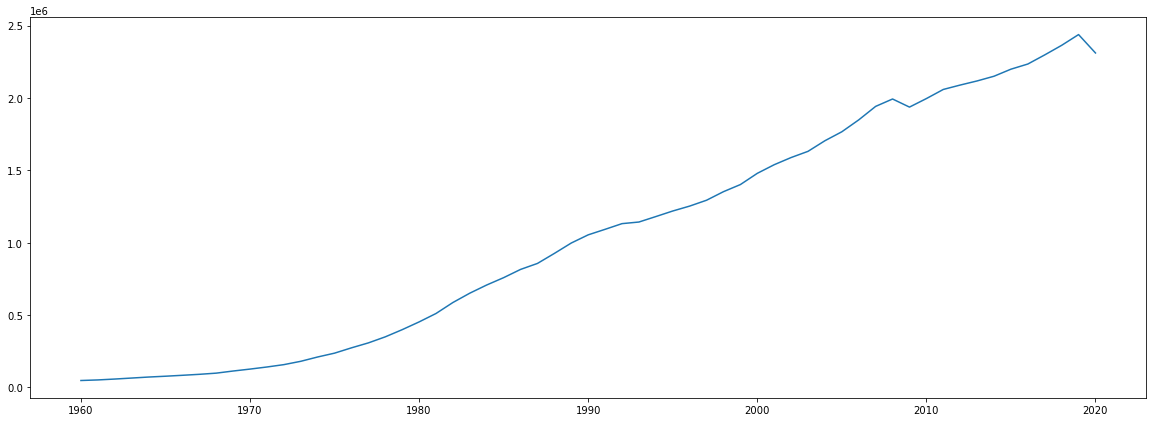

In [449]:
plt.plot(nominalGDP.France)

## Trade Activity

For each country, we get the export and import with other countries and store them into dictionnaries

In [663]:
list_countries = ["Australia", "France", "Germany", "Switzerland", "UnitedStates",
                  "Canada", "UnitedKingdom", "Denmark", "Italy"]
dict_paths = {}
dict_xls = {}
# dict export contains a set per country, representing the exports from this country to partners
dict_export = {}
# dict import contains a set per country, representing the imports of this country from partners
dict_import = {}

for country in list_countries:
    dict_paths[country] = f"data_StatApp/imf/trade/{country}.xls"
    dict_xls[country] = pd.ExcelFile(dict_paths[country])
    dict_export[country] = pd.read_excel(dict_xls[country], dict_xls[country].sheet_names[0], index_col=None)
    dict_export[country] = clean_trade_dataset(dict_export[country])\
                            .rename(columns={
        "United States": "UnitedStates",
        "United Kingdom": "UnitedKingdom",
    })
    dict_export[country] = dict_export[country].T.drop_duplicates().T
    dict_import[country] = pd.read_excel(dict_xls[country], dict_xls[country].sheet_names[1], index_col=None)
    dict_import[country] = clean_trade_dataset(dict_import[country])\
                            .rename(columns={
        "United States": "UnitedStates",
        "United Kingdom": "UnitedKingdom",
    })
    dict_import[country] = dict_import[country].T.drop_duplicates().T
    for column in dict_import[country].columns:
        dict_import[country][column] = dict_import[country][column].astype("float")
        dict_import[country][column] = dict_import[country][column].round(2)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (510790) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (516104) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (536840) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (528008) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (529451) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [664]:
def get_trade_activity(country_i, country_j):
    """
    Takes 2 countries as input
    Returns a dataframe with trade activity between these two countries
    X_i_j: export from country i to j
    X_i: total global export from country i
    M_i_j: import of country i from j
    M_i: total global import of country i
    Y_i: GDP of country i
    """
    X_i_j = dict_export[country_i][[country_j]].rename(columns={country_j: f"Export from {country_i} to {country_j}"})
    X_i = dict_export[country_i][["World"]].rename(columns={"World": f"Global Export from {country_i} to world"})
    X_j = dict_export[country_j][["World"]].rename(columns={"World": f"Global Export from {country_j} to world"})
    M_i_j = dict_import[country_i][[country_j]].rename(columns={country_j: f"Import of {country_i} from {country_j}"})
    M_i = dict_import[country_i][["World"]].rename(columns={"World": f"Global Import of {country_i}"})
    M_j = dict_import[country_j][["World"]].rename(columns={"World": f"Global Import of {country_j}"})
    Y_i = nominalGDP[[country_i]].rename(columns={country_i: f"GDP of {country_i}"})
    Y_j = nominalGDP[[country_j]].rename(columns={country_j: f"GDP of {country_j}"})
    W_i_j = pd.concat([X_i_j, X_i, M_i_j, M_i, X_j, M_j, Y_i, Y_j], axis=1)
    W_i_j["wt: Trade Intensity by bilateral trade"] = (X_i_j.values + M_i_j.values) / (X_i.values + X_j.values + M_i.values + M_j.values)
    W_i_j["wy: Trade Intensity by GDP"] = (X_i_j.values + M_i_j.values) / (Y_i.values + Y_j.values)
    for column in W_i_j.columns:
        W_i_j[column] = W_i_j[column].astype(float)
        W_i_j[column] = 100*np.log(W_i_j[column])
    return W_i_j


In [712]:
trade_activity_countries = {}
trade_activity_countries_fourth_diff = {}
trade_activity_countries_HP = {}
for country_i in list_countries:
    trade_activity_countries[country_i] = {}
    trade_activity_countries_fourth_diff[country_i] = {}
    trade_activity_countries_HP[country_i] = {}
    for country_j in list_countries:
        if country_i != country_j:
            trade_activity_countries[country_i][country_j] = get_trade_activity(country_i, country_j)
            trade_activity_countries_fourth_diff[country_i][country_j] = trade_activity_countries[country_i][country_j].diff(4)
            trade_activity_countries_HP[country_i][country_j] = pd.DataFrame()
            for column in trade_activity_countries[country_i][country_j].columns:
                trade_activity_countries_HP[country_i][country_j][column] =  sm.tsa.filters.hpfilter(trade_activity_countries[country_i][country_j][column], 6.25)[0]
                
            

## Plot an example of Global Export data, with 2 de-trending methods

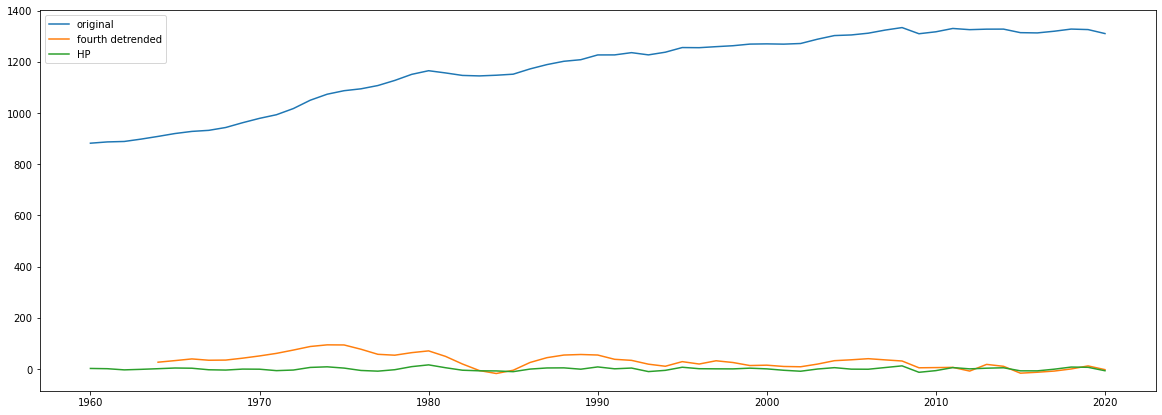

In [713]:
plt.plot(trade_activity_countries["France"]["Australia"]["Global Export from France to world"], label="original")
plt.plot(trade_activity_countries_fourth_diff["France"]["Australia"]["Global Export from France to world"], label="fourth detrended")
plt.plot(trade_activity_countries_HP["France"]["Australia"]["Global Export from France to world"], label="HP")
plt.legend()

## Compute wt and wy for all pairs of countries

In [715]:
def get_average_period(date1, date2, country_i, country_j):
    return np.log(np.abs(pd.DataFrame(
                trade_activity_countries[country_i][country_j][["wt: Trade Intensity by bilateral trade", "wy: Trade Intensity by GDP"]]\
                    .loc[date1:date2].mean()))).T


In [727]:
dy_df = pd.DataFrame(columns=["country_1", "country_2", "period"])
for country_i in list_countries:
    trade_activity_countries_split[country_i] = {}
    trade_activity_countries_fourth_diff_split[country_i] = {}
    trade_activity_countries_HP_split[country_i] = {}
    for country_j in list_countries:
        if country_i != country_j:
            for (period, date1, date2) in [(1, 1960, 1967), (2, 1967, 1976), (3,1976, 1985), (4, 1985, 1994)]:
                df_countries_ij = pd.DataFrame(data={"country_1": [country_i], "country_2": [country_j], "period": [period]})
                df_countries_ij[["wt", "wy"]] = get_average_period(date1, date2, country_i, country_j)[["wt: Trade Intensity by bilateral trade", "wy: Trade Intensity by GDP"]]
                dy_df = pd.concat([dy_df, df_countries_ij])
            
            
            

In [728]:
dy_df

,country_1,country_2,period,wt,wy
0,Australia,France,1,6.174672,6.419042
0,Australia,France,2,6.293247,6.480923
0,Australia,France,3,6.338274,6.503024
0,Australia,France,4,6.332366,6.516634
0,Australia,Germany,1,6.197983,NaN
...,...,...,...,...,...
0,Italy,UnitedKingdom,4,5.876286,NaN
0,Italy,Denmark,1,6.170459,NaN
0,Italy,Denmark,2,6.213137,NaN
0,Italy,Denmark,3,6.215150,NaN
